# Machine Learning, January 2022 Assignment Task

### Leyu Gao

### 6th Febrary 2022 

# Preface 

### After reading the task requirements,  I summarized three questions to be solved:


### 1.Build a model to predict  the Scent Quality Score 

### 2.To find if any scent chemicals have similar response from customers(the only response provided is score)

### 3.Build a model to group the data

### Based on the three questions, I made the following exploration.

## 1.  Observe and Clean the data-set

First of all,  I should hava a comprehensive understanding of the data-set. Then, check the data type and whether there are null values. Finally, clean the data-set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Score_data = pd.read_csv("Perfume Score .csv")
Preference_data = pd.read_csv("Perfume preference .csv")

 observe the structure of the data-set 

In [3]:
Score_data[0:5]

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver,Scent Quality Score
0,489.766,343.510,638.519,315.377,966.417,913.256,1015.036,479.027,485.797,2918.050062,108.538,727.438,936.842,4801.306119,261.952,148.593,783.264,809.541,1.302700e+07
1,472.841,218.288,642.332,210.582,995.068,989.447,958.614,507.113,242.015,2119.074840,246.654,755.477,840.936,4896.315590,149.498,44.490,906.204,815.512,1.159073e+07
2,472.620,323.480,696.770,288.379,1006.334,875.163,987.398,611.463,410.451,2679.139347,281.022,729.155,825.386,5350.521973,177.980,141.612,705.294,794.394,1.367693e+07
3,503.155,397.632,644.533,151.414,960.097,905.462,1031.227,469.357,388.405,1784.035393,280.953,711.906,786.198,5029.939322,29.515,149.231,678.681,837.614,7.997427e+06
4,499.780,344.096,643.764,353.518,1033.988,978.976,871.312,439.266,311.002,3236.214279,272.058,737.003,898.238,4988.788504,138.884,122.238,622.090,824.174,1.113290e+07


In [4]:
Preference_data[0:10]

,Customer No.,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
0,C_0000001,1353.0,1252.0,4066.0,3838.0,2144.0,4404.0,32082,3866.0,2505.0,3972.0,4485.0,6441,4106.0,1722.0,4287.0,4820.0,4140.0,1463.0
1,C_0000002,1089.0,2152.0,4045.0,3710.0,2235.0,4352.0,30398,4769.0,2995.0,4720.0,4532.0,10931,3794.0,1638.0,4648.0,4472.0,4184.0,1071.0
2,C_0000003,4177.0,3592.0,3596.0,1745.0,3234.0,2116.0,21678,4864.0,3178.0,3381.0,1376.0,18153,2502.0,1733.0,1747.0,2728.0,4580.0,4742.0
3,C_0000004,4899.0,3738.0,2454.0,3976.0,4945.0,3853.0,17963,3040.0,2943.0,2870.0,4016.0,18819,1990.0,5118.0,2391.0,2012.0,3470.0,3057.0
4,C_0000005,4822.0,4030.0,3447.0,4225.0,4078.0,3772.0,23988,3389.0,2415.0,2695.0,3887.0,20367,2118.0,4530.0,2427.0,3205.0,4319.0,2289.0
5,C_0000006,2251.0,2305.0,4058.0,3330.0,1775.0,4882.0,16567,5148.0,4443.0,2472.0,2615.0,11655,3061.0,1549.0,1563.0,1709.0,3426.0,3003.0
6,C_0000007,1661.0,2199.0,4994.0,2795.0,2231.0,4108.0,31511,3584.0,2771.0,4153.0,4462.0,11061,3791.0,2123.0,4528.0,4716.0,4124.0,2016.0
7,C_0000008,4690.0,3674.0,3827.0,2130.0,3483.0,2544.0,21010,4284.0,2457.0,3610.0,1819.0,18601,3917.0,2129.0,1609.0,2614.0,3879.0,3962.0
8,C_0000009,4735.0,3236.0,3255.0,3349.0,4221.0,4038.0,22356,3202.0,2804.0,2754.0,2968.0,16407,1899.0,4813.0,2878.0,2862.0,3125.0,2692.0
9,C_0000010,1259.0,2679.0,3541.0,3159.0,1937.0,4619.0,31967,4662.0,2797.0,3840.0,5327.0,13610,3317.0,1889.0,4457.0,4795.0,4390.0,1690.0


 Check the data-set for null values, using the function isnull()

In [5]:
Score_data.isnull().sum().sum()

0

In [6]:
Score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Narcissus            5004 non-null   float64
 1   Agrumen              5004 non-null   float64
 2   Oud                  5004 non-null   float64
 3   Jasmine              5004 non-null   float64
 4   Amber                5004 non-null   float64
 5   Neroli               5004 non-null   float64
 6   Indole               5004 non-null   float64
 7   Vanilla              5004 non-null   float64
 8   Frankincense         5004 non-null   float64
 9   Bergamot             5004 non-null   float64
 10  Galbanum             5004 non-null   float64
 11  Magnolia             5004 non-null   float64
 12  Sandalwood           5004 non-null   float64
 13  Cashmeran            5004 non-null   float64
 14  Citron               5004 non-null   float64
 15  Opopanax             5004 non-null   f

Score_data is clean

In [7]:
Preference_data.isnull().sum()

Customer No.            0
Narcissus               3
Agrumen                 4
Oud                     8
Jasmine                 2
Amber                   3
Neroli                  5
Indole                  0
Vanilla                 3
Frankincense            6
Bergamot                7
Galbanum                8
Magnolia                0
Sandalwood              5
Cashmeran               5
Citron                 10
Opopanax                8
Aliphatic Aldehydes     5
Vetiver                10
dtype: int64

 I find that 'Perfume preference.csv'  contains null value  and need  to  be processed
using info() function to learn the data type and non-null count of the data-set

In [8]:
Preference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer No.         9497 non-null   object 
 1   Narcissus            9494 non-null   float64
 2   Agrumen              9493 non-null   float64
 3   Oud                  9489 non-null   float64
 4   Jasmine              9495 non-null   float64
 5   Amber                9494 non-null   float64
 6   Neroli               9492 non-null   float64
 7   Indole               9497 non-null   object 
 8   Vanilla              9494 non-null   float64
 9   Frankincense         9491 non-null   float64
 10  Bergamot             9490 non-null   float64
 11  Galbanum             9489 non-null   float64
 12  Magnolia             9497 non-null   object 
 13  Sandalwood           9492 non-null   float64
 14  Cashmeran            9492 non-null   float64
 15  Citron               9487 non-null   f

 In the column 'Dtype', Indole and Magnolia's datatype are object. Having looking through the two columns of Preference_data, I find there exist a string '#VALUE!'. 

 Also, using missingno to plot matrix and bar gragh can visualize the missing datas

<AxesSubplot:>

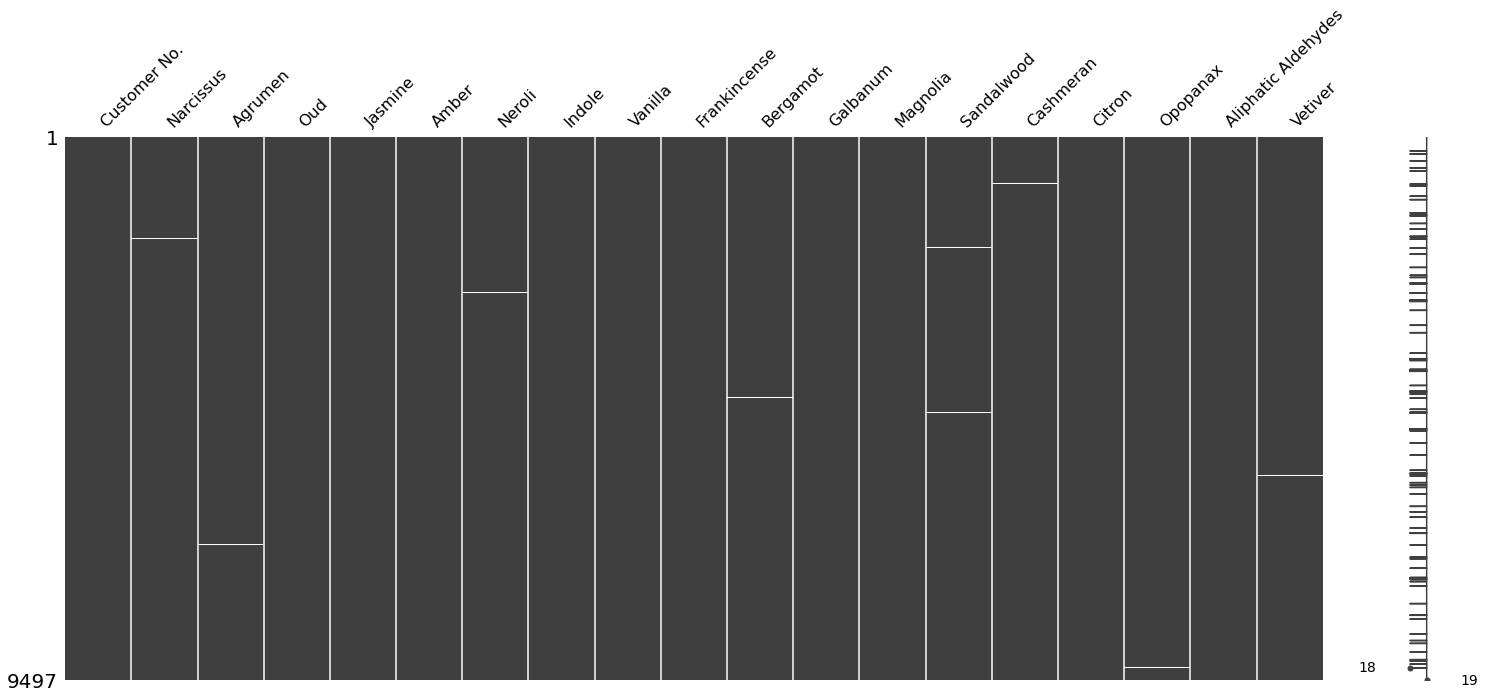

In [9]:
import missingno as msno
msno.matrix(Preference_data)

<AxesSubplot:>

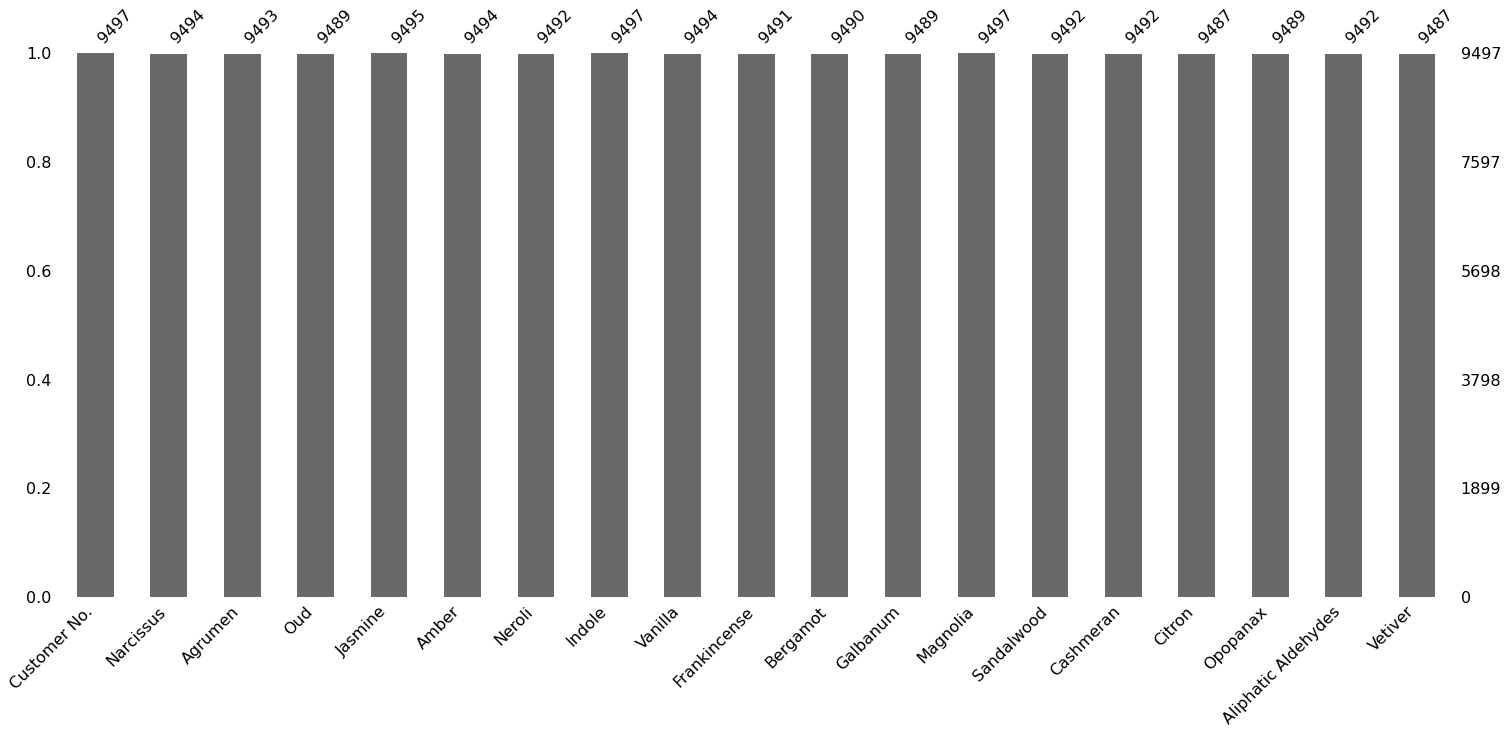

In [10]:
msno.bar(Preference_data)

 I find that Preference_data contains string type data: ' Customer No.'. According to the knowledge learned in the course, I can use get_dummies to deal with the problem. But after some thought, I decide to drop the column directly. The customer number is just serial number, and it has no effect on the problem we want to deal with.

In [11]:
#change = pd.get_dummies(Preference_data['Customer No.'])
#Preference_data.drop('Customer No.', axis = 1, inplace = True)
#Preference_data = change.join(Preference_data)

 To handle '#VALUE!' , raplace '#VALUE' with '0' firstly, and then transform '0''s type into float using astype()

In [12]:
Preference_data.replace("#VALUE!", "0", inplace = True)
Preference_data['Indole'] = Preference_data['Indole'].astype('float')
Preference_data['Magnolia'] = Preference_data['Magnolia'].astype('float')

 fill nan with the mean of the column using mean(). It should be noted that 'Cusomer No.' is still a string . And it should be ignored when fillna()

In [13]:
for column_name in Preference_data:     # replace nan with mean number 
    if column_name == 'Customer No.':
        continue
    Preference_data[column_name].fillna(Preference_data[column_name].mean(), inplace = True)

  Now, using info() function again , there is no null value and the datatype is all float. The data-set is clean.

In [14]:
Preference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer No.         9497 non-null   object 
 1   Narcissus            9497 non-null   float64
 2   Agrumen              9497 non-null   float64
 3   Oud                  9497 non-null   float64
 4   Jasmine              9497 non-null   float64
 5   Amber                9497 non-null   float64
 6   Neroli               9497 non-null   float64
 7   Indole               9497 non-null   float64
 8   Vanilla              9497 non-null   float64
 9   Frankincense         9497 non-null   float64
 10  Bergamot             9497 non-null   float64
 11  Galbanum             9497 non-null   float64
 12  Magnolia             9497 non-null   float64
 13  Sandalwood           9497 non-null   float64
 14  Cashmeran            9497 non-null   float64
 15  Citron               9497 non-null   f

describe() can show us some numbers about the data-set

In [15]:
Preference_data.describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,3265.382663,3121.755083,3763.242597,3106.079726,3005.079524,3821.780341,22717.530273,4312.222878,3113.745970,3426.057113,3139.691538,15802.067916,3217.781184,2446.029709,2479.632023,2947.475182,4202.323957,3008.485190
std,1390.185415,924.677336,552.703701,686.295198,991.817371,1059.214805,5272.173858,861.173049,661.136409,740.553332,1223.181744,4635.413252,784.966899,1342.497301,1190.376272,1046.250991,408.918266,1218.977044
min,515.000000,584.000000,1998.000000,1373.000000,946.000000,642.000000,0.000000,1685.000000,1239.000000,1703.000000,551.000000,0.000000,1237.000000,58.000000,30.000000,1057.000000,2256.000000,283.000000
25%,1962.000000,2334.000000,3384.000000,2539.000000,2119.000000,3177.000000,18741.000000,3645.000000,2628.000000,2728.000000,2073.000000,11872.000000,2546.000000,1582.000000,1620.000000,2149.000000,3936.000000,2093.000000
50%,2912.000000,3370.000000,3779.000000,3201.000000,2941.000000,4193.000000,20906.000000,4573.000000,2908.000000,3525.000000,3003.000000,17049.000000,3515.000000,1860.000000,2071.000000,2582.000000,4214.000000,2875.000000
75%,4598.000000,3913.000000,4141.000000,3616.000000,3764.000000,4569.000000,28084.000000,4953.000000,3715.000000,4036.000000,4293.000000,19763.000000,3773.000000,2765.000000,3963.000000,4030.000000,4486.000000,3858.000000
max,5761.000000,5119.000000,5811.000000,4936.000000,5798.000000,5826.000000,35793.000000,6136.000000,4814.000000,5267.000000,5998.000000,25873.000000,4879.000000,6348.000000,5061.000000,5562.000000,5547.000000,6072.000000


# 2. Build model to predict the Scent Quality Score 

 In the technical lecture, I learned that logistic regression can predict result based on training data. I will build linear model and poynomial model at the same time, and compare the two models to know which fits the situation better. 

In [16]:
from pandas.plotting import scatter_matrix
import seaborn as sns

 Plot matrix gragh 

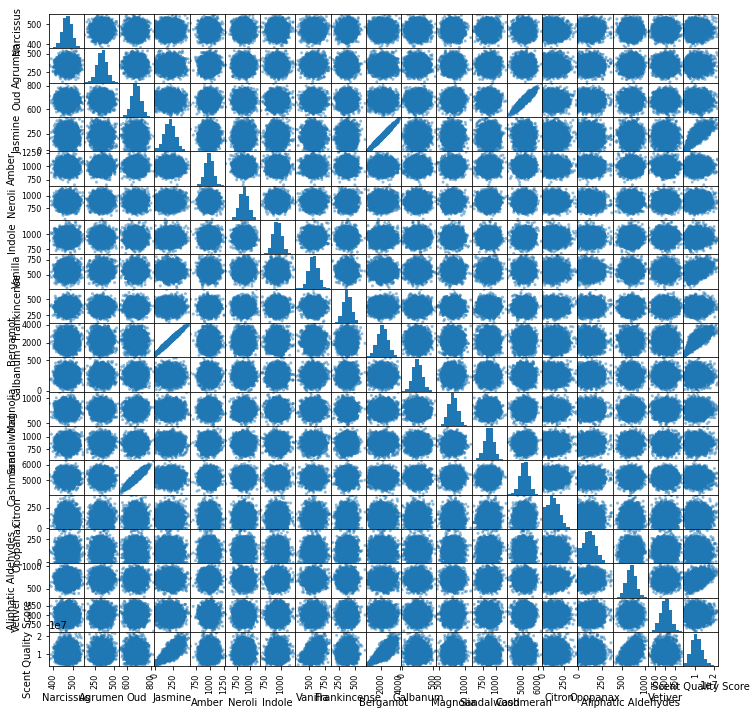

In [17]:
scatter_matrix(Score_data,figsize=(12,12));

 Plot heatmap to know which columns are strongly related with Scent Quality Score.

(19.5, -0.5)

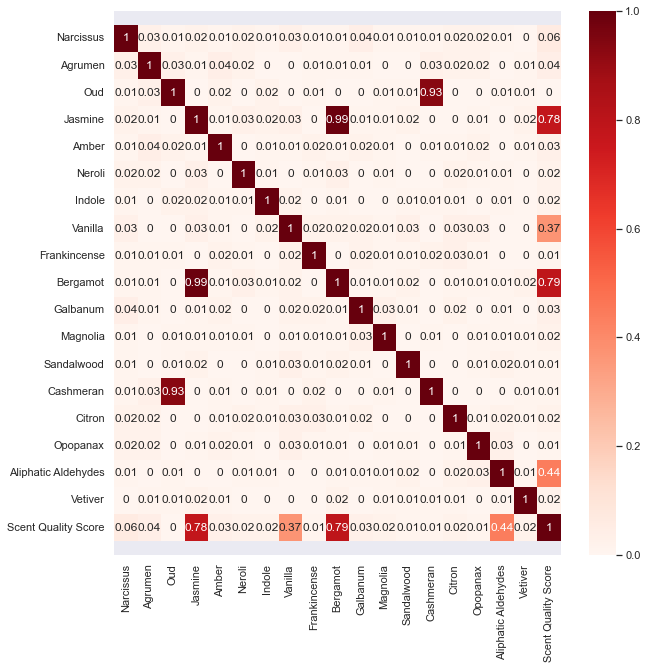

In [18]:
correlation_matrix = np.absolute(Score_data.corr().round(2))
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### 'Jasmine', 'Valilla', 'Bergamot' and 'Aliphatic Aldehydes' are the columns strongly related with 'Scent Quality Score' while others have almost nothing to do with Score. So next, I will take the four columns as X,  Score as Y to Build models

## 2.1 Linear regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

 Transform 'Scent Quality Score' 's datatype into int. 

In [20]:
X = pd.DataFrame(np.c_[Score_data['Jasmine'], Score_data['Vanilla'], Score_data['Bergamot'], Score_data['Aliphatic Aldehydes']], columns = ['Jasmine','Vanilla','Bergamot','Aliphatic Aldehydes'])
Y = Score_data['Scent Quality Score'].astype('int')
X

,Jasmine,Vanilla,Bergamot,Aliphatic Aldehydes
0,315.377,479.027,2918.050062,783.264
1,210.582,507.113,2119.074840,906.204
2,288.379,611.463,2679.139347,705.294
3,151.414,469.357,1784.035393,678.681
4,353.518,439.266,3236.214279,622.090
...,...,...,...,...
4999,220.188,600.726,2209.955448,662.834
5000,268.901,583.384,2453.815268,819.217
5001,204.422,539.192,2007.515839,741.248
5002,147.307,510.981,1762.999938,804.591


 First I build logisticregression model, but it's effect is bad 

In [21]:
from sklearn.model_selection import train_test_split
logModel = LogisticRegression(solver = 'liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
logModel = logModel.fit(X_train, Y_train)
predictions = logModel.predict(X_test)
predictions

array([17057114, 17487441, 11298433, ..., 12941338, 17250723, 15162427])

In [22]:
logModel.score(X_train, Y_train)

0.16837371971021733

 And then , I build linear model, and the model score is 0.97. It is pretty good.

In [23]:
lin_Model = LinearRegression()
lin_Model.fit(X_train,Y_train)
pre = lin_Model.predict(X_test)
pre

array([10004111.85108776, 15509472.58118889,  9546658.5240611 , ...,
       11393590.09140505,  7971568.58958718,  9133468.07647214])

In [24]:
lin_Model.score(X_test,Y_test)

0.9735238081013957

 Also , I take RMSE and R2 as measurements of the model 

In [25]:
Y_train_predicted = lin_Model.predict(X_train)
Y_test_predicted= lin_Model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_predicted))
r2_train = r2_score(Y_train,Y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_predicted))
r2_test = r2_score(Y_test,Y_test_predicted)
print("R2: ")
print("Train = :", r2_train)
print("Test = :", r2_test)
print("RMSE: ")
print("Train = :", rmse_train)
print("Test = :", rmse_test)

R2: 
Train = : 0.97071760026915
Test = : 0.9735238081013957
RMSE: 
Train = : 489435.4411498092
Test = : 470927.503330983


## 2.2 Polynomial regression 

 In a similar way , I build polynomial model. In practic , I 've tried to set degree from 2 to 6, and find degree = 3 is optimal  

In [26]:
poly_features = PolynomialFeatures(degree=3)  # degree = 3 is optimal
X_train_poly = poly_features.fit_transform(X_train)
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly,Y_train)

LinearRegression()

In [27]:
X_test_poly = poly_features.fit_transform(X_test)

 In a similar way , using score() and RMSE and R2 to measure the quality of the model 

In [28]:
polynomial_model.score(X_test_poly,Y_test)

0.9961241283235671

In [29]:
Y_train_predicted = polynomial_model.predict(X_train_poly)
Y_test_predicted= polynomial_model.predict(X_test_poly)
rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_predicted))
r2_train = r2_score(Y_train,Y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_predicted))
r2_test = r2_score(Y_test,Y_test_predicted)
print("R2: ")
print("Train = :", r2_train)
print("Test = :", r2_test)
print("RMSE: ")
print("Train = :", rmse_train)
print("Test = :", rmse_test)

R2: 
Train = : 0.9962409914896274
Test = : 0.9961241283235671
RMSE: 
Train = : 175359.27306242834
Test = : 180181.82851409775


### By conparision, polynomial model is better than linear model when degree =3 and it is the optimal situation. 

# 3. Build Kmeans model to group data

 In the lecture ,I have learned two models: Kmeans and Guassian mixture mode, which are both able to group the data. After thoughts, I decide to choose Kmeans to build model, beacause of its effectiveness and simplicity 

In [30]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

 As mentioned above, just drop the 'Customer No.' directly

In [31]:
Preference_data.drop(['Customer No.'],axis = 1,inplace=True)

Visualize the preference_data to observe

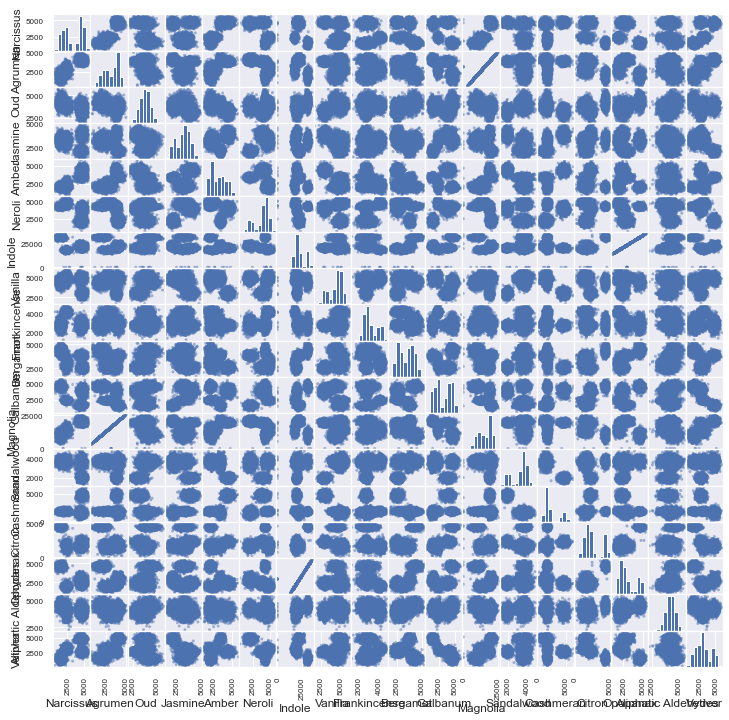

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(Preference_data, figsize=(12,12));

Standardize the preference_data, it can speed up the training of the model

In [33]:
standardized_Preference_data = preprocessing.scale(Preference_data)
standardized_Preference_data_df = pd.DataFrame(standardized_Preference_data, columns = Preference_data.columns)

###  TO find the optimal K of Kmeans algorithm, using silhouette_score as measureent. 4 is the optimal value of K

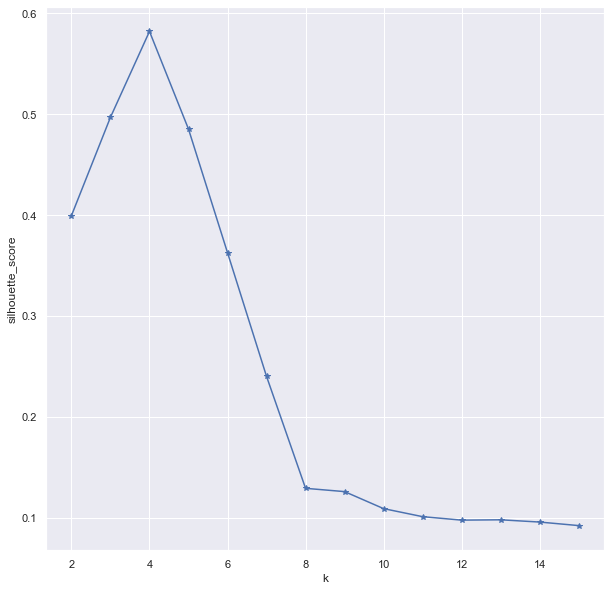

In [34]:
from sklearn import metrics
def k_silhouette(X, clusters):
    K = range(2, clusters + 1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
    
    plt.plot(K,S,'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    plt.show()

k_silhouette(standardized_Preference_data_df, 15)
# 4 is the optimal value of K

Using standard data to build Kmeans model 

In [35]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(standardized_Preference_data_df)

KMeans(n_clusters=4)

y_km is the group number of each row of data

In [36]:
y_km = kmeans.fit_predict(standardized_Preference_data_df)

In [37]:
print(y_km[0:30])

[1 1 0 2 2 3 1 0 2 1 0 1 1 1 0 2 3 3 2 1 0 3 0 0 3 0 3 2 3 0]


_cluster_Centers return the centers of each group

In [38]:
standard_centers = kmeans.cluster_centers_
standard_centers

array([[ 0.90638695,  0.99381461,  0.04883221, -1.40107939,  0.37454187,
        -1.59030928, -0.13556622,  0.70373206, -0.45305188,  0.52350583,
        -1.24439817,  0.99130466,  0.46500412, -0.67859451, -0.71193968,
        -0.13864473,  0.12810446,  1.45221773],
       [-1.2345529 , -1.27841445,  0.84571864,  0.21695373, -1.00251791,
         0.4677676 ,  1.55303636,  0.12346678, -0.43796367,  1.19821614,
         1.18028798, -1.27663712,  0.56702368, -0.50325856,  1.59486712,
         1.56359936,  0.82022759, -1.19924176],
       [ 1.01512708,  0.75401605, -1.09476607,  1.04776978,  1.37499078,
         0.14680867, -0.54018956, -1.52078422, -0.61896137, -1.13774394,
         0.62329158,  0.75237149, -1.61128735,  1.66687438, -0.18799296,
        -0.54276709, -0.53338134, -0.30061661],
       [-0.63508675, -0.41641312,  0.1801924 ,  0.10214018, -0.71073531,
         0.92559669, -0.90918885,  0.69966415,  1.49956699, -0.59666119,
        -0.60720389, -0.41414534,  0.57117372, -0.483

.describe() return some number of the data-set. std(sqrt(variance)) indicate the spread for each group for each dimension 

In [39]:
Preference_data[y_km == 0].describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.00000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000
mean,4525.362234,4040.664550,3790.230917,2144.576293,3376.537103,2137.389897,22002.839224,4918.226054,2814.232649,3813.72069,1617.646552,20396.932759,3582.774811,1535.066379,1632.200545,2802.425636,4254.705452,4778.612069
std,349.249746,302.365917,409.663416,234.062972,235.146201,382.985172,1955.432646,351.991811,387.982350,204.46770,274.797163,1567.923681,374.979781,436.559500,372.119258,380.100277,286.065698,363.423895
min,3265.382663,3089.000000,2472.000000,1373.000000,2550.000000,642.000000,0.000000,3618.000000,1402.000000,2989.00000,551.000000,0.000000,2443.000000,58.000000,251.000000,1424.000000,3311.000000,3552.000000
25%,4290.750000,3824.000000,3517.750000,1993.000000,3221.000000,1876.000000,20745.500000,4675.000000,2546.750000,3678.00000,1434.000000,19321.000000,3344.750000,1240.000000,1375.000000,2549.000000,4068.000000,4537.000000
50%,4528.500000,4036.000000,3793.500000,2144.500000,3377.000000,2136.000000,22024.500000,4920.000000,2806.000000,3815.00000,1618.000000,20366.500000,3590.000000,1534.500000,1636.500000,2801.500000,4248.000000,4770.000000
75%,4762.000000,4249.000000,4070.250000,2302.250000,3530.000000,2393.500000,23184.250000,5168.250000,3091.000000,3952.00000,1797.000000,21444.250000,3829.000000,1825.000000,1882.000000,3038.000000,4455.250000,5021.000000
max,5761.000000,5119.000000,5227.000000,2890.000000,4164.000000,3821.780341,27856.000000,6050.000000,4215.000000,4515.00000,2530.000000,25873.000000,4879.000000,3174.000000,3043.000000,3955.000000,5220.000000,6072.000000


In [41]:
Preference_data[y_km == 1].describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.00000,2423.000000
mean,1549.215593,1939.696455,4230.649808,3254.966191,2010.817202,4317.220619,30904.976888,4418.543541,2824.207489,4313.353352,4583.322231,9884.638877,3662.852572,1770.442026,4378.024046,4583.306428,4537.71234,1546.713979
std,311.886444,441.086517,443.127706,359.180995,263.085817,217.397428,1464.841559,390.610146,422.703685,281.009987,357.332936,2216.386045,262.956990,252.359018,210.164473,266.719961,303.34208,397.721856
min,515.000000,584.000000,2742.000000,2071.000000,1044.000000,3636.000000,0.000000,3036.000000,1239.000000,3417.000000,3139.691538,0.000000,2625.000000,904.000000,2479.632023,2947.475182,3429.00000,283.000000
25%,1342.500000,1638.000000,3926.000000,3010.000000,1833.000000,4170.000000,30042.500000,4153.500000,2534.000000,4122.500000,4344.500000,8390.500000,3487.500000,1599.000000,4245.500000,4408.000000,4328.00000,1265.000000
50%,1547.000000,1949.000000,4228.000000,3260.000000,2014.000000,4316.000000,30932.000000,4429.000000,2827.000000,4320.000000,4573.000000,9929.000000,3665.000000,1766.000000,4382.000000,4586.000000,4541.00000,1549.000000
75%,1762.000000,2245.000000,4537.500000,3494.000000,2185.000000,4464.500000,31772.500000,4682.000000,3107.000000,4494.500000,4830.500000,11428.500000,3840.000000,1938.000000,4514.000000,4755.000000,4742.00000,1815.000000
max,3265.382663,3489.000000,5811.000000,4540.000000,3005.079524,5069.000000,35793.000000,5769.000000,4205.000000,5267.000000,5998.000000,17583.000000,4535.000000,2580.000000,5061.000000,5562.000000,5547.00000,3034.000000


In [42]:
Preference_data[y_km == 2].describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,4676.523226,3818.939930,3158.193195,3825.121233,4368.747466,3977.274071,19869.706926,3002.633446,2704.549617,2583.541409,3902.050285,19289.437078,1953.040541,4683.686246,2255.861443,2379.634470,3984.226066,2642.059736
std,322.755997,245.804939,365.915794,337.839483,369.074874,428.063916,1723.066835,311.890119,215.473699,241.430960,451.327033,1289.891950,206.879634,427.602786,294.111868,315.056847,339.352847,351.319935
min,3687.000000,3077.000000,1998.000000,2549.000000,3160.000000,2314.000000,0.000000,1685.000000,1926.000000,1703.000000,2361.000000,0.000000,1237.000000,2446.029709,1294.000000,1460.000000,2847.000000,1393.000000
25%,4456.750000,3654.750000,2907.000000,3588.000000,4115.750000,3701.000000,18804.750000,2784.000000,2557.000000,2420.750000,3596.000000,18484.000000,1817.000000,4397.750000,2053.500000,2161.000000,3754.000000,2415.750000
50%,4675.500000,3821.000000,3166.000000,3823.000000,4362.500000,3974.000000,19895.000000,3010.000000,2704.000000,2584.000000,3900.500000,19317.000000,1952.000000,4672.000000,2261.500000,2382.000000,3990.000000,2633.500000
75%,4886.000000,3990.000000,3406.250000,4057.000000,4622.250000,4254.000000,20985.500000,3214.000000,2847.250000,2744.000000,4209.250000,20140.500000,2091.000000,4965.500000,2455.000000,2598.250000,4211.000000,2881.250000
max,5683.000000,4633.000000,4533.000000,4936.000000,5798.000000,5211.000000,24821.000000,4065.000000,3427.000000,3426.057113,5611.000000,23275.000000,2628.000000,6348.000000,3310.000000,3360.000000,5273.000000,3803.000000


In [43]:
Preference_data[y_km == 3].describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,2382.540814,2736.727578,3862.830362,3176.174350,2300.197016,4802.134443,17924.380972,4914.723061,4105.112109,2984.220944,2397.009929,13882.434199,3666.110043,1797.083021,1597.874223,1990.871092,4027.254672,3135.422643
std,284.152391,431.377492,353.215883,371.072616,418.912518,315.996257,1480.395214,382.316570,211.067060,398.457807,228.531911,2156.101492,289.527027,284.332792,434.829699,269.205667,428.522104,369.391291
min,1401.000000,1322.000000,2659.000000,1896.000000,946.000000,3762.000000,0.000000,3603.000000,3113.745970,1725.000000,1498.000000,6803.000000,2605.000000,888.000000,30.000000,1057.000000,2256.000000,1917.000000
25%,2194.000000,2441.500000,3626.250000,2932.250000,2009.000000,4594.250000,17016.000000,4664.000000,3963.000000,2704.000000,2243.250000,12419.000000,3467.000000,1596.250000,1302.000000,1801.000000,3737.000000,2890.250000
50%,2380.000000,2733.500000,3862.500000,3168.000000,2315.000000,4799.000000,17968.500000,4916.000000,4108.000000,2993.000000,2397.500000,13863.500000,3673.000000,1801.000000,1604.000000,1997.000000,4022.000000,3131.000000
75%,2579.000000,3041.750000,4100.000000,3432.000000,2582.000000,5022.000000,18876.500000,5167.000000,4247.750000,3255.000000,2553.000000,15403.000000,3864.000000,1988.750000,1896.000000,2174.750000,4322.750000,3384.000000
max,3424.000000,4157.000000,5285.000000,4350.000000,3613.000000,5826.000000,22575.000000,6136.000000,4814.000000,4255.000000,3250.000000,20987.000000,4731.000000,2696.000000,3329.000000,2947.475182,5529.000000,4575.000000


In [44]:
std = np.array(Preference_data.std())
print("std: ",std)
mean = np.array(Preference_data.mean())
print("mean: ",mean)

std:  [1390.1854147   924.6773364   552.70370106  686.29519773  991.81737059
 1059.21480477 5272.17385835  861.17304921  661.13640936  740.55333167
 1223.18174363 4635.41325245  784.96689884 1342.49730105 1190.37627245
 1046.25099067  408.91826611 1218.97704429]
mean:  [ 3265.38266273  3121.75508269  3763.24259669  3106.07972617
  3005.07952391  3821.78034134 22717.53027272  4312.22287761
  3113.74596987  3426.05711275  3139.69153757 15802.06791618
  3217.78118416  2446.02970923  2479.63202277  2947.47518179
  4202.32395702  3008.48519026]


To find the real center of each group of original data-set, we can use the formula standard_data = (original_data - mean)/std

In [45]:
# standard_data = (original_data - mean)/std
centers1 = standard_centers[0] * std + mean
centers1

array([ 4525.42857481,  4040.71293236,  3790.23233815,  2144.52566768,
        3376.55666136,  2137.30120971, 22002.80159397,  4918.2579617 ,
        2814.21687904,  3813.74110106,  1617.56641246, 20397.17468911,
        3582.79402914,  1535.01841494,  1632.15592558,  2802.41799865,
        4254.7082097 ,  4778.70527033])

Also, We can build Kmeans model based on the original data-set directly to find the group centers of original data.

In [46]:
kmeans_ori = KMeans(n_clusters = 4)
kmeans_ori.fit(Preference_data)
centers = kmeans_ori.cluster_centers_
centers

array([[ 2387.63392804,  2732.08725539,  3861.51711155,  3177.449811  ,
         2304.28856763,  4799.43753899, 17884.5401092 ,  4910.9102154 ,
         4101.32402013,  2984.53052135,  2399.972151  , 13852.56110878,
         3662.71086198,  1801.68714369,  1600.3876086 ,  1992.44384773,
         4027.32072571,  3135.16271565],
       [ 1550.52842867,  1940.56139713,  4230.48513627,  3254.58649597,
         2011.51220781,  4316.41005393, 30915.0321915 ,  4418.79364424,
         2824.406416  ,  4313.31208062,  4582.14270167,  9882.43747421,
         3662.62929475,  1770.68428795,  4376.69387703,  4583.44160132,
         4537.46306232,  1548.32602987],
       [ 4675.65961945,  3819.45919662,  3158.33466604,  3824.59707388,
         4367.74799154,  3976.84608879, 19893.72135307,  3003.66511628,
         2705.09830526,  2583.63934762,  3901.72053895, 19298.71162791,
         1953.4858351 ,  4682.41861721,  2255.94456493,  2378.68245243,
         3984.6132448 ,  2642.21879728],
       [ 4515

Finally, we can take some columns to visualize

2D: groups overlap each other

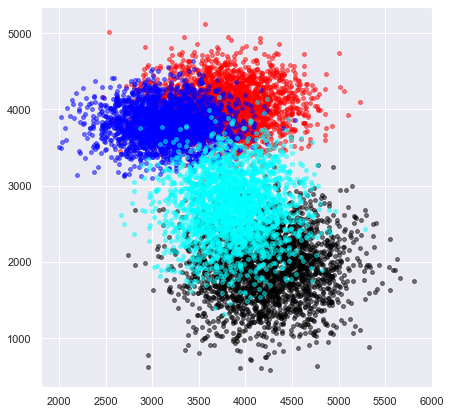

In [47]:
plt.figure(figsize = (7,7))
plt.scatter(Preference_data[y_km == 0]['Oud'], Preference_data[y_km == 0]['Agrumen'],
           s = 15, c = 'red', alpha = 0.5)
plt.scatter(Preference_data[y_km == 1]['Oud'], Preference_data[y_km == 1]['Agrumen'],
           s = 15, c = 'black', alpha = 0.5)
plt.scatter(Preference_data[y_km == 2]['Oud'], Preference_data[y_km == 2]['Agrumen'],
           s = 15, c = 'blue', alpha = 0.5)
plt.scatter(Preference_data[y_km == 3]['Oud'], Preference_data[y_km == 3]['Agrumen'],
           s = 15, c = 'cyan', alpha = 0.5)

In [48]:
from mpl_toolkits.mplot3d import Axes3D

3D gragh, it is amazing.

In [49]:
%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(20,20)
ax.set_xlabel('Narcissus')
ax.set_ylabel('Agrumen')
ax.set_ylabel('Oud')
ax.scatter(Preference_data[y_km == 0]['Narcissus'], Preference_data[y_km == 0]['Agrumen'],Preference_data[y_km == 0]['Oud'],
           s = 15, c = 'red', alpha = 0.3)
ax.scatter(Preference_data[y_km == 1]['Narcissus'], Preference_data[y_km == 1]['Agrumen'],Preference_data[y_km == 1]['Oud'],
           s = 15, c = 'black', alpha = 0.3)
ax.scatter(Preference_data[y_km == 2]['Narcissus'], Preference_data[y_km == 2]['Agrumen'],Preference_data[y_km == 2]['Oud'],
           s = 15, c = 'blue', alpha = 0.3)
ax.scatter(Preference_data[y_km == 3]['Narcissus'], Preference_data[y_km == 3]['Agrumen'],Preference_data[y_km == 3]['Oud'],
           s = 15, c = 'cyan', alpha = 0.3)

Using matplotlib backend: Qt5Agg


inertia_ is also a quality indicator for Kmeans model 

In [50]:
kmeans.inertia_

30865.25437171896

# Conclusions and insight about the data

## Question answers: 

### 1.  Build linear regression and polynomial regression model to predict the score for any new perfume based on the quality of scent chemicals used. The linear model' score is 0.9702687131743002 and the polynomial model's optimal score is 0.9962219436473585 when degree = 3 

### 2.  From my point of view, the only response from customers is Score. By ploting heatmap, I found that 'Jasmine', 'Valilla', 'Bergamot' and 'Aliphatic Aldehydes' are the columns strongly related with 'Scent Quality Score' while others have almost nothing to do with Score. 

### 3.1 By building Kmeans model, I find there are 4 groups(optimal) . The inertial of the Kmeans model is 30865.25437171896 and silhouette_score is closed to 0.6
### 3.2 Best mixtures of each group can be reflected by centers of each group
###          The four group centers are:
        array([[ 2387.63392804,  2732.08725539,  3861.51711155,  3177.449811  ,
         2304.28856763,  4799.43753899, 17884.5401092 ,  4910.9102154 ,
         4101.32402013,  2984.53052135,  2399.972151  , 13852.56110878,
         3662.71086198,  1801.68714369,  1600.3876086 ,  1992.44384773,
         4027.32072571,  3135.16271565],
       [ 4675.65961945,  3819.45919662,  3158.33466604,  3824.59707388,
         4367.74799154,  3976.84608879, 19893.72135307,  3003.66511628,
         2705.09830526,  2583.63934762,  3901.72053895, 19298.71162791,
         1953.4858351 ,  4682.41861721,  2255.94456493,  2378.68245243,
         3984.6132448 ,  2642.21879728],
       [ 1550.52842867,  1940.56139713,  4230.48513627,  3254.58649597,
         2011.51220781,  4316.41005393, 30915.0321915 ,  4418.79364424,
         2824.406416  ,  4313.31208062,  4582.14270167,  9882.43747421,
         3662.62929475,  1770.68428795,  4376.69387703,  4583.44160132,
         4537.46306232,  1548.32602987],
       [ 4515.25660767,  4040.89647766,  3790.94318204,  2148.58075601,
         3371.61128846,  2149.5208594 , 21997.2169244 ,  4918.34125677,
         2819.97368813,  3809.9806701 ,  1620.79725086, 20404.93642612,
         3584.1102072 ,  1536.01331615,  1631.65990724,  2799.3556701 ,
         4253.66694498,  4770.75601375]])

### 3.3 .variance or std can indicate the spread of each group for each dimensions. I take std as the indicator
std of each group for each dimensions:

group0:

349.249746	302.365917	409.663416	234.062972	235.146201	382.985172	1955.432646	351.991811	387.982350	204.46770	274.797163	1567.923681	374.979781	436.559500	372.119258	380.100277	286.065698	363.423895

group1:

322.755997	245.804939	365.915794	337.839483	369.074874	428.063916	1723.066835	311.890119	215.473699	241.430960	451.327033	1289.891950	206.879634	427.602786	294.111868	315.056847	339.352847	351.319935

group2:

322.755997	245.804939	365.915794	337.839483	369.074874	428.063916	1723.066835	311.890119	215.473699	241.430960	451.327033	1289.891950	206.879634	427.602786	294.111868	315.056847	339.352847	351.319935

group3:

284.152391	431.377492	353.215883	371.072616	418.912518	315.996257	1480.395214	382.316570	211.067060	398.457807	228.531911	2156.101492	289.527027	284.332792	434.829699	269.205667	428.522104	369.391291

From the std and the visualization gragh results, each group is similar with regard to some chemicals but have a wide range of responses to other scent chemicals

## Another thoughts

### 1. The best ingredients（the highest score） can be found by changing the proportion of perfume with the prediction model. This helps businesses develop attractive fragrances and it is commercially valuable

###  2. Seperating customers into several groups based on some features can be useful to determine product category.
###  According to the preference of each group, businesses can customize product. This is better meet the needs